In [16]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.metrics import accuracy_score
from joblib import dump, load
np.random.seed(1)


In [20]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [21]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [22]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
print(permutation)
X = X[permutation]
y = y[permutation]

[10840 56267 14849 ... 42613 43567 68268]


In [27]:
cnt=5
sampleX = X[0:cnt]
sampley = y[0:cnt]
exampleX = sampleX.reshape(sampleX.shape[0],28,28)
print(exampleX.shape)
print(exampleX)

(5, 28, 28)
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


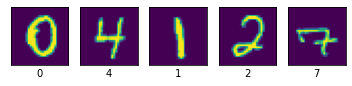

In [28]:
for i in range(exampleX.shape[0]):
    subplt = plt.subplot(1, exampleX.shape[0], i + 1)
    subplt.imshow(exampleX[i,:,:])  
    subplt.set_xticks(())
    subplt.set_yticks(())
    subplt.set_xlabel(y[i])
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
clf = LogisticRegression(
    C=50. / X_train.shape[0], penalty='l1', solver='saga', tol=0.1
)
clf.fit(X_train, y_train)

LogisticRegression(C=0.0008928571428571428, penalty='l1', solver='saga',
                   tol=0.1)

In [11]:
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 84.69%
Test score with L1 penalty: 0.8401


Text(0.5, 0.98, 'Classification vector for...')

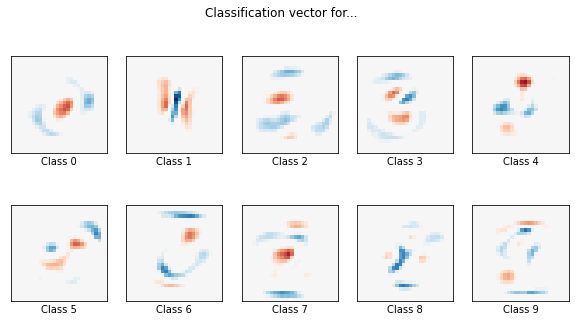

In [12]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

In [13]:
# Training score
y_pred_tuned = clf.predict(X_train)
accuracy_score(y_train, y_pred_tuned)

0.83975

In [14]:
# Test score
y_pred_tuned = clf.predict(X_test)
accuracy_score(y_test, y_pred_tuned)

0.8401428571428572

In [15]:
A = X_test[0,:]
predictions = clf.predict_proba(A.reshape(1, -1))
y_pred_tuned = clf.predict(A.reshape(1, -1))
print(predictions)
print(y_pred_tuned)
print(y_test[0])

[[0.02264426 0.01901333 0.01528826 0.01933849 0.67505329 0.0454021
  0.01927373 0.04245956 0.02942765 0.11209933]]
['4']
4


In [16]:
A=np.ones((1,784))
predictions = clf.predict_proba(A)
print(predictions)

[[0.04683246 0.01522985 0.15330595 0.07667659 0.03879292 0.04518991
  0.14765318 0.04012704 0.35007937 0.08611272]]


In [15]:
from joblib import dump, load

dump(clf, "logres.m5")
np.save("logres_mean.npy", scaler.mean_)
np.save("logres_var.npy", scaler.var_)
np.save("logres_scale.npy", scaler.scale_)

NameError: name 'clf' is not defined

In [17]:
# Load from file
joblib_model = load("logres.m5")

# Calculate the accuracy and predictions
score = joblib_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))

NameError: name 'X_test' is not defined

In [31]:
A = X_test[0,:]
A.reshape(1, -1)
print(A.shape)

(784,)


(1, 28, 28)


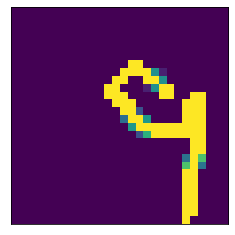

In [46]:
A=np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 128, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 255, 255, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 22, 128, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 255, 255, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 65, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 92, 255, 255, 135, 0, 0, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 136, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 65, 163, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 97, 255, 184, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 184, 255, 98, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0]]).reshape(1,-1)
B = A.reshape(1,28,28)
print(B.shape)
for i in range(B.shape[0]):
    subplt = plt.subplot(1, B.shape[0], i + 1)
    subplt.imshow(B[i,:,:])  
    subplt.set_xticks(())
    subplt.set_yticks(())
plt.show()

In [49]:
joblib_model = load("logres.m5")

print(joblib_model.predict_proba(scaler.transform(A)))
print(joblib_model.classes_)
C = {
    "class":joblib_model.classes_,
    "prob":joblib_model.predict_proba(scaler.transform(A)) [0]
}
print(C)

[[0.18757257 0.14988402 0.18941716 0.10889873 0.04226815 0.05794351
  0.04816787 0.12811853 0.0119545  0.07577496]]
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
{'class': array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object), 'prob': array([0.18757257, 0.14988402, 0.18941716, 0.10889873, 0.04226815,
       0.05794351, 0.04816787, 0.12811853, 0.0119545 , 0.07577496])}


In [38]:
print(B.shape)

(1, 28, 28)


In [71]:
scaler2=StandardScaler()
scaler2.mean_ = scaler.mean_
print(scaler.scale_)

[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 4.92002405e-01 1.40895133e+00 9.12758445e-01 3.80316019e-02
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 6.76117367e-02 2.55401329e-01 1.32170599e+00 2.09983686e+00
 3.24004022e+00 3.32133418e+00 5.06398154e+00 5.50496997e+00
 6.11782824e+00 5.76555668e+00 6.33962565e+00 6.03849756e+00
 5.57812121e+00 5.20732092e+00 4.65196774e+00 3.50872643e+00
 2.81342735e+00 1.99051514e+00 1.25374057e+00 8.34878065e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 2.70446947e-01 1.34295018e-01
 6.26035854e-01 1.07620821e+00 2.75666331e+00 4.90493367e+00
 7.15165833e+00 9.719510

In [69]:
scaler.var_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.42066366e-01, 1.98514385e+00, 8.33127980e-01, 1.44640274e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.57134694e-03, 6.52298390e-02, 1.74690673e+00, 4.40931483e+00,
       1.04978606e+01, 1.10312608e+01, 2.56439091e+01, 3.03046944e+01,
       3.74278224e+01, 3.32416438e+01, 4.01908534e+01, 3.64634528e+01,
       3.11154362e+01, 2.71161912e+01, 2.16408039e+01, 1.23111612e+01,
       7.91537344e+00, 3.96215053e+00, 1.57186543e+00, 6.97021383e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      